<a href="https://colab.research.google.com/github/psterritt5/property-sale-price-predictor/blob/main/property_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project description**

In this project I will use data obtained from a [Kaggle datascience challenge](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview) to create a model for predicting housing prices. I am doing this project to gain more experience with processes such as data cleaning, feature engineering, and modeling.

Will solve with linear regression and random forests.



#**Results and Reflection**

*Random Forests Model*:
*   24 features 19 selected using sklearn's Recursive Feature Elimination (RFE) and 5 based on domain knowledge to fill in gaps
*   Used sklearn's OneHotEncoder to binarily encode categorical features with exception of the Neighborhood feature which used a target-based approach.

*   RMSLE: 0.14523473555779537


*Linear Regression Model*:
*   14 features selected with domain knowledge and informed by correlation with target value.
*   Graphed features against target value and scaled features to improve performance of model
*   Applied regularization via sklearn Ridge model and tuned paramters with sklearn's GridSearch

*   RMSLE: 0.16293354216009082

Reflection


*   Low effort solutions (e.g. use of all attributes as features, encoding categorical attributes with standard packages) produced decent results, but I was able to see improvements when applying domain knowledge and feature selection methods
*   Results are not meant to imply that random forests models are better than linear regression models for this task
*   Performance of linear model came close to random forests model with far fewer features due to exploitation of domain knowledge and scaling of features to better coerrelate with the target value
*   If I were to continue this project, I would start with sklearn's Ridge model instead of the LinearRegression model due to the offered features of regularization and tuning
*   I would also look into combining features and rescaling my features to
  *   optimize RMSLE for Ridge rather than LinearRegression model
  *   try applying a normalization of the target value SalePrice and rescale accordingly
  *   identify relationships between variables and reduce number of features





# Solve with random forests

## Overview

Note:

*   For simplicity I only included the code of the second pass.
*   *Basic Data cleaning used in each pass* - removed columns with high volume of missing entries and no clean default values
*   More information on each pass below


**First pass**

*Data cleaning* -

Used sklearn OneHotEncoder to transform categorical data to binary 0 and 1 values

*Model creation & performance* -


*   Used all numerical and encoded categorical data as features
*   Tuned hyperparameters and obtained result of:

>RMSLE: 0.15293571426091468

**Second pass**

*Data cleaning* -

*   Again used OneHotEncoder
*   Identified most influential features & optimal number of features (20) using sklearn's Recursive Feature Elimination (RFE)
*   Analyzed features and used domain knowledge to reduce redundancies and add missing features that would influence price
*   Noticed binary encoder failing to capture importance of key features such as neighborhood. Re-encoded neighborhood as the log of median home price for each neighborhood

*Model creation & performance* -

*   Used select number of features obtained via RFE and domain knowledge
*   Tuned hyperparameters and obtained result of:

>RMSLE: 0.14523473555779537


**Third pass**

*Data cleaning* -

Used sklearn target encoder to transform categorical data in relation to target house sale price

*Model creation and performance* -

*   Used all numerical and encoded categorical columns as features
*   Tuned hyperparameters and obtained result of:

>RMSLE: 0.14822703419299205

## Feature selection & data cleaning

In [ ]:
import pandas as pd
from google.colab import drive
import os
prefix = '/content/drive'
drive.mount(prefix, force_remount=True)
data = pd.read_csv('/content/drive/My Drive/Colab-Notebooks/project-datasets/kaggle-housing-data/data.csv')
columns_with_nulls = data.columns[data.isnull().any()]
data = data.drop(columns=columns_with_nulls)
print(data.columns)

Mounted at /content/drive
Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# encoder found to be ineffctive in translating neighborhood..use same method as in linear model
# Use target-based approach to encode neighborhood
median_prices = data.groupby('Neighborhood')['SalePrice'].median()

log_median_prices = np.log(median_prices)
data['LogMedianPrice'] = data['Neighborhood'].map(log_median_prices)
data.drop('Neighborhood', axis=1)


# Identify categorical data and use one-hot encode on remaining categorical variables
non_numerics = [column for column in data.columns if data[column].dtype not in ['int64', 'float64']]

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(data[non_numerics])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(non_numerics))

# Drop the original non-numeric columns from data and concatenate the encoded DataFrame
data = data.drop(non_numerics, axis=1)
final_data = pd.concat([data, encoded_df], axis=1)

# Obtain train-test split
X = final_data.drop('SalePrice', axis=1)
y = final_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Previously determined these were most influential features & first 20 influential produced an optimal coerrelation and MSE
# compared to 5, 10, 15, 25, 40, etc.
top_20_features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1', '1stFlrSF', 'LotArea', 'GarageArea', 'YearBuilt', 'GarageCars', 'YearRemodAdd', 'OpenPorchSF', 'TotRmsAbvGrd', 'BsmtUnfSF', 'WoodDeckSF', 'FullBath', 'MoSold', 'OverallCond', 'CentralAir_Y', 'Fireplaces']
features = top_20_features
# Based on domain knowledge add and remove particular features
features.remove('GarageArea') # redundant and prone to overfitting...num of cars is a better feature
features.append('LogMedianPrice')
features.append('HalfBath')
features.append('MiscVal')
features.append('SaleType_WD')
features.append('BedroomAbvGr')

In [ ]:
potential_features = final_data.drop(features, axis=1)
potential_features.columns

Index(['Id', 'MSSubClass', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenAbvGr', 'GarageArea', 'EnclosedPorch',
       '3SsnPorch',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=167)

## Create model and evaluate performance

In [ ]:
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Step 2: Subset the data
X_train_updated = X_train[features]
X_test_updated = X_test[features]

# Step 3: Initialize and train the model using only the top 10 features
model = RandomForestRegressor(n_estimators=180, random_state=42)
model.fit(X_train_updated, y_train)

# Step 4: Predict on the test set
y_pred = model.predict(X_test_updated)

# Step 5: Evaluate the model
msle = mean_squared_log_error(y_test, y_pred)
rmsle = np.sqrt(msle)

print(f'RMSLE: {rmsle}')

RMSLE: 0.14523473555779537


## Test outliers impact on performance

*   Contrary to my belief that outliers would hurt performance. Removal of any outliers decreased metrics.
*   Even removal of the 3 most extreme outliers (samples with house price of greater than 5 Z-scores - 3/1168 samples) reduced performance to:

> RMSLE: 0.1482258168372143

# **Solve with linear regression**

## Overview

Notes:


*   While use of encoders on categorical data yielded good performance results for random forests, I observed slight increase in performance metrics when using a combination of domain knowledge and out of the box encoders & feature selection tools
*   For the purpose of experimentation, I will rely more on domain knowledge and attempt to observe relationships between features and SalePrice to self-engineer features



## Feature selection & data cleaning:

In [ ]:
import pandas as pd
from google.colab import drive
import os
from sklearn.model_selection import train_test_split
prefix = '/content/drive'
drive.mount(prefix, force_remount=True)

data = pd.read_csv('/content/drive/My Drive/Colab-Notebooks/project-datasets/kaggle-housing-data/data.csv')
len(data.columns)

Mounted at /content/drive


81

Currently we have 81 columns (43 categorical and 38 numeric). Let's analyze these columns with the goal of locating the most influential columns on Sales Price of a home. Minimizing the number of features will help us avoid overfitting the training datset and lead to a more generalized model. Let's start by classifying the columns as numeric or non-numeric.

In [ ]:
non_numerics = [column for column in data.columns if data[column].dtype not in ['int64', 'float64']]
numerics = [column for column in data.columns if data[column].dtype in ['int64', 'float64']]

# Calculate correlation between each numeric column in df with the target value sale price
correlations = []
for column in numerics:
    correlation = data['SalePrice'].corr(data[column])
    correlations.append((column, correlation))

correlations.sort(key=lambda x: x[1], reverse=True)
for column, correlation in correlations:
  print(f'{column}: {correlation}')

SalePrice: 1.0
OverallQual: 0.7909816005838044
GrLivArea: 0.7086244776126523
GarageCars: 0.6404091972583529
GarageArea: 0.6234314389183618
TotalBsmtSF: 0.6135805515591956
1stFlrSF: 0.6058521846919147
FullBath: 0.5606637627484449
TotRmsAbvGrd: 0.5337231555820282
YearBuilt: 0.5228973328794969
YearRemodAdd: 0.5071009671113864
GarageYrBlt: 0.4863616774878609
MasVnrArea: 0.4774930470957163
Fireplaces: 0.4669288367515272
BsmtFinSF1: 0.3864198062421532
LotFrontage: 0.3517990965706781
WoodDeckSF: 0.3244134445681295
2ndFlrSF: 0.3193338028320681
OpenPorchSF: 0.31585622711605554
HalfBath: 0.2841076755947831
LotArea: 0.2638433538714057
BsmtFullBath: 0.2271222331314938
BsmtUnfSF: 0.21447910554696892
BedroomAbvGr: 0.16821315430073985
ScreenPorch: 0.11144657114291107
PoolArea: 0.09240354949187321
MoSold: 0.04643224522381938
3SsnPorch: 0.04458366533574846
BsmtFinSF2: -0.011378121450215127
BsmtHalfBath: -0.016844154297359016
MiscVal: -0.021189579640303255
Id: -0.021916719443431112
LowQualFinSF: -0.0256

Takeaways from correlation:
- Domain knowledge suggests elements like home SQFT, number of bathrooms and bedrooms, garage, land area, overall quality, year built and year remodeled are important features
- Per my research, listing agents and appraisers don't typically include basement area in the sqft of the home (GrLiveArea - is total SQFT excluding basement). Informed by this and high correlation with SalePrice I will keep GrLiveArea as a feature and eliminate other SQFT metrics.
- Keeping both columns for garage cars and garage area would be redundant. Keep column garage cars.
- Surprised to see year sold (YrSold) and month sold (MoSold) had very low and negative correlations with sale price. Looking further into the dataset, I noted this dataset contains data on homes sold between 2006-2010. This is the time period of the housing-market crisis in the United States which explains why little to no correlation was observed. Over more typical time horizons I would expect housing prices to slowly increase year over year.
- Also surpised to see that OverallCondition of the home had a negative relationship with price.

In [ ]:
drop_numerics = ['GarageArea', '1stFlrSF', 'GarageYrBlt', '1stFlrSF', '2ndFlrSF', 'BsmtUnfSF', 'BsmtFinSF2', 'Id']
features_numerics = ['GrLivArea','FullBath','HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'LotArea','GarageCars', 'OverallQual', 'YearBuilt', 'YearRemodAdd']
candidate_numerics = [elem for elem in numerics if not(elem in drop_numerics or elem in features_numerics)]

correlations = []
for column in candidate_numerics:
    correlation = data['SalePrice'].corr(data[column])
    correlations.append((column, correlation))

correlations.sort(key=lambda x: x[1], reverse=True)
for column, correlation in correlations:
  print(f'{column}: {correlation}')

SalePrice: 1.0
TotalBsmtSF: 0.6135805515591956
MasVnrArea: 0.4774930470957163
Fireplaces: 0.4669288367515272
BsmtFinSF1: 0.3864198062421532
LotFrontage: 0.3517990965706781
WoodDeckSF: 0.3244134445681295
OpenPorchSF: 0.31585622711605554
BsmtFullBath: 0.2271222331314938
ScreenPorch: 0.11144657114291107
PoolArea: 0.09240354949187321
MoSold: 0.04643224522381938
3SsnPorch: 0.04458366533574846
BsmtHalfBath: -0.016844154297359016
MiscVal: -0.021189579640303255
LowQualFinSF: -0.025606130000679593
YrSold: -0.028922585168730374
OverallCond: -0.07785589404867803
MSSubClass: -0.08428413512659531
EnclosedPorch: -0.12857795792595653
KitchenAbvGr: -0.13590737084214122


Scale Featues

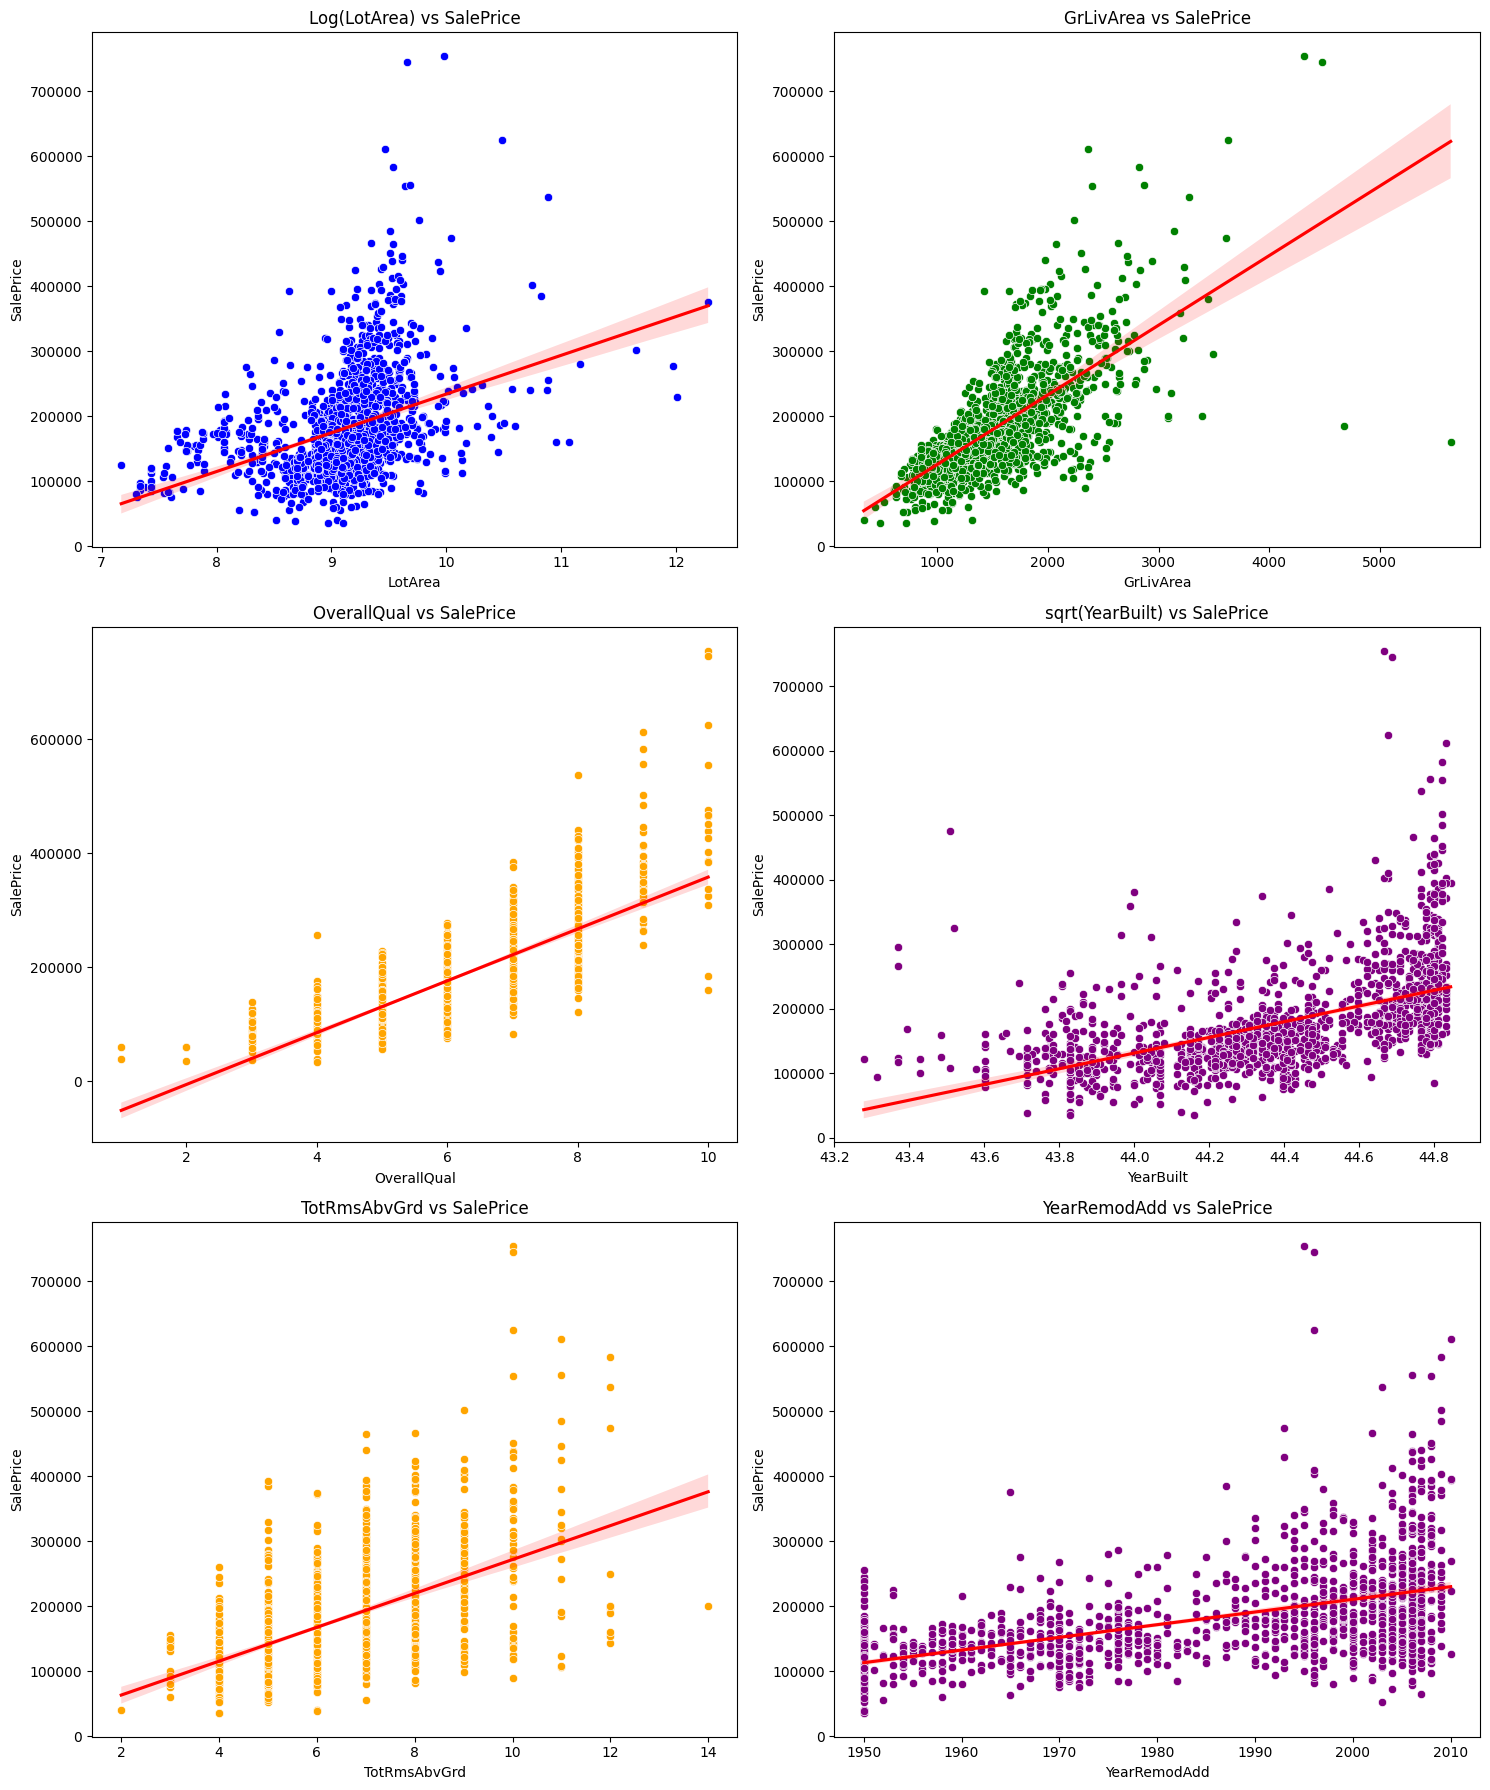

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a figure and a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

# Define the columns and titles for the subplots
plot_configs = [
    {'x': 'LotArea', 'transform': np.log, 'title': 'Log(LotArea) vs SalePrice', 'color': 'blue'},
    {'x': 'GrLivArea', 'transform': None, 'title': 'GrLivArea vs SalePrice', 'color': 'green'},
    {'x': 'OverallQual', 'transform': None, 'title': 'OverallQual vs SalePrice', 'color': 'orange'},
    {'x': 'YearBuilt', 'transform': np.sqrt, 'title': 'sqrt(YearBuilt) vs SalePrice', 'color': 'purple'},
    {'x': 'TotRmsAbvGrd', 'transform': None, 'title': 'TotRmsAbvGrd vs SalePrice', 'color': 'orange', 'filter': True},
    {'x': 'YearRemodAdd', 'transform': None, 'title': 'YearRemodAdd vs SalePrice', 'color': 'purple'}
]

# Iterate over the subplots
for ax, config in zip(axs.flatten(), plot_configs):
    x_data = data[config['x']]
    if config['transform']:
        x_data_transformed = config['transform'](x_data + 1)  # Apply transformation, +1 to handle zeros if necessary
    else:
        x_data_transformed = x_data

    # Filter out zero values only for the specified subplot
    if config.get('filter', False) and config['x'] == 'MiscVal':
        valid_indices = x_data > 0
        if config['transform']:
          x_data_filtered = x_data_transformed[valid_indices]
        else:
          x_data_filtered = x_data[valid_indices]
        y_data_filtered = data['SalePrice'][valid_indices]
    else:
        x_data_filtered = x_data_transformed
        y_data_filtered = data['SalePrice']

    # Plot scatter plot and regression line
    sns.scatterplot(x=x_data_filtered, y=y_data_filtered, ax=ax, color=config['color'])
    sns.regplot(x=x_data_filtered, y=y_data_filtered, ax=ax, scatter=False, color='red')

    # Set title
    ax.set_title(config['title'])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Transform features based on observed relationships
data['LotArea_log'] = np.log(data['LotArea'])
data['YearBuilt_sqrt'] = np.sqrt(data['YearBuilt'])
data['MiscVal_log'] = np.log1p(data['MiscVal'])
# update features list
features_numerics.append('LotArea_log')
features_numerics.remove('LotArea')
features_numerics.append('YearBuilt_sqrt')
features_numerics.remove('YearBuilt')
features_numerics.append('MiscVal_log')
features_numerics

['GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'GarageCars',
 'OverallQual',
 'YearRemodAdd',
 'LotArea_log',
 'YearBuilt_sqrt',
 'MiscVal_log']

Now that we have a shortlist of features from the numeric dataset (and a list of potential features to consider later) let's transition to looking at the non-numeric dataset.

In [ ]:
str_non = ""
for feature in non_numerics:
  str_non = str_non + feature + ', '
str_non[:-2]

'MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition'

'LotShape', 'LandSlope', 'Utilities', 'CentralAir', 'Functional' and 'Street' can easily be transformed into a numeric value and likely have a significant impact on cost. Neighborhood is certainly also an important factor, but harder to translate - we will look at neighborhood next.

In [ ]:
def convert_non_numerics(df):
  mapLotShape = {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3':3}  # Reg=Regular, IR1=slightly irregular...model could penalize properties with irregular shapes
  mapUtilities = {'ELO': 1, 'NoSeWa': 2, 'NoSwer': 3, 'AllPub': 4} # assign num of available public utilities
  mapLandSlope = {'Gtl': 1, 'Mod': 2, 'Sev': 3} # similar thought as lot shape higher slopes may be penalized
  mapAC = {'N': 0, 'Y': 1}
  mapFunctional = {'Typ': 0, 'Min1': 1,	'Min2': 2,'Mod': 3, 'Maj1': 4, 'Maj2': 5,
                  'Sev': 6, 'Sal': 7} # higher scores = num deductions...chance for model to penalize
  mapStreetPaved = {'Grvl': 0, 'Pave': 1}

  df['LotShape'] = df['LotShape'].map(mapLotShape)
  df['LandSlope'] = df['LandSlope'].map(mapLandSlope)
  df['Utilities'] = df['Utilities'].map(mapUtilities)
  df['CentralAir'] = df['CentralAir'].map(mapAC)
  df['Functional'] = df['Functional'].map(mapFunctional)
  df['Street'] = df['Street'].map(mapStreetPaved)


In [ ]:
convert_non_numerics(data)

Above strategy led to improvement via addition of 'Street' to the model but weaker performance on on ther features. Let's try a more target-based encoding strategy for a few non-numeric attributes that domain knowledge would suggest are influential. Try attributes Neighborhoood, Functional and SaleType.

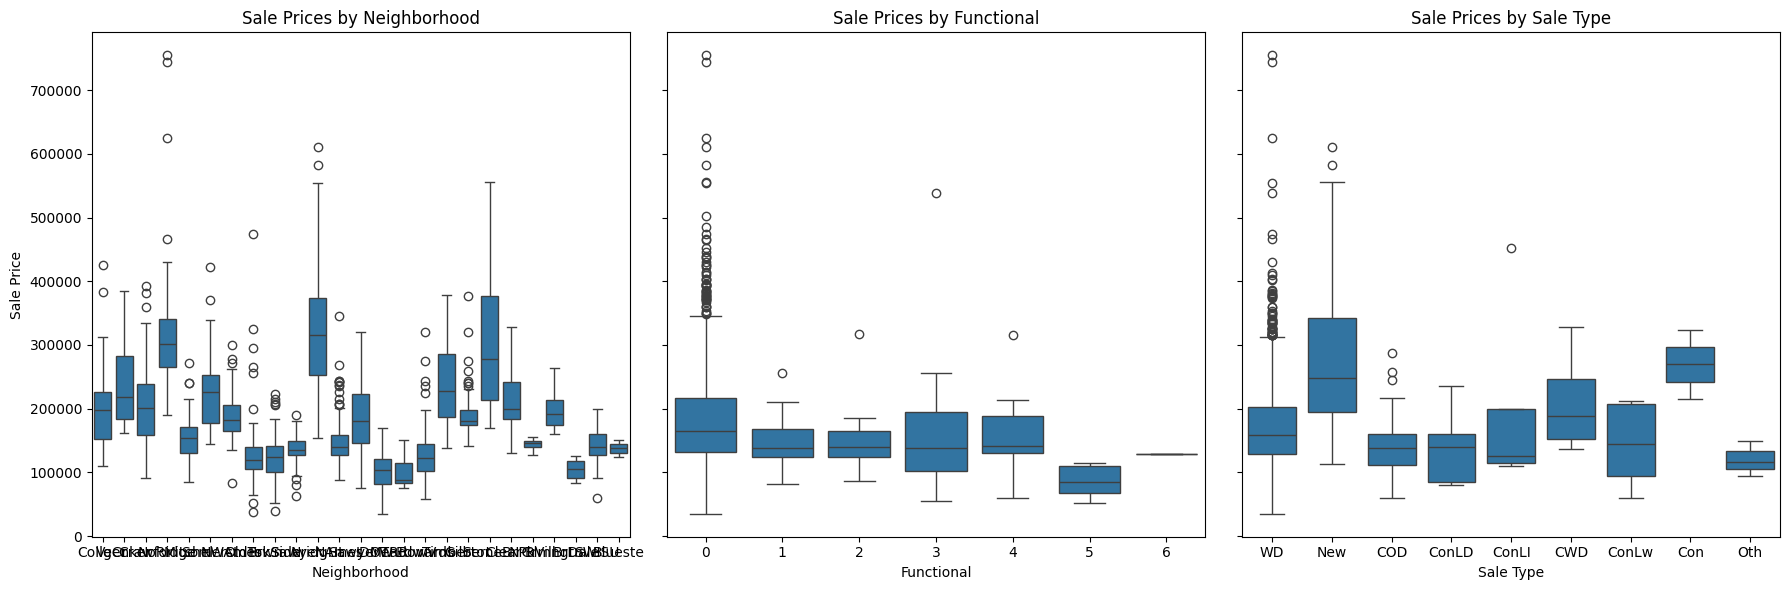

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes for 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot 1: Neighborhood vs SalePrice
sns.boxplot(x='Neighborhood', y='SalePrice', data=data, ax=axes[0])
axes[0].set_xlabel('Neighborhood')
axes[0].set_ylabel('Sale Price')
axes[0].set_title('Sale Prices by Neighborhood')

# Plot 2: Functional vs SalePrice
sns.boxplot(x='Functional', y='SalePrice', data=data, ax=axes[1])
axes[1].set_xlabel('Functional')
axes[1].set_title('Sale Prices by Functional')

# Plot 3: SaleType vs SalePrice
sns.boxplot(x='SaleType', y='SalePrice', data=data, ax=axes[2])
axes[2].set_xlabel('Sale Type')
axes[2].set_title('Sale Prices by Sale Type')

# Adjust the layout to make space for labels
plt.tight_layout()

# Show plot
plt.show()


While high variation of SalePrice is observed in most categories of all 3 graphs, the median values do differ which suggests we can derive meaning from a target-based encoding strategy.

In [ ]:
# Calculate the median sale price for each neighborhood
median_neighborhood = data.groupby('Neighborhood')['SalePrice'].median()
median_functional = data.groupby('Functional')['SalePrice'].median()
median_sale_type = data.groupby('SaleType')['SalePrice'].median()

# Take the log and sqrt of the median sale price
log_median_neighborhood = np.log(median_neighborhood)
sqrt_median_neighborhood = np.sqrt(median_neighborhood)


data['Neighborhood_LogMedianPrice'] = data['Neighborhood'].map(log_median_neighborhood)
data['Neighborhood_MedianPrice'] = data['Neighborhood'].map(median_neighborhood)
data['Neighborhood_SQRTMedianPrice'] = data['Neighborhood'].map(sqrt_median_neighborhood)

data['SaleType_MedianPrice'] = data['SaleType'].map(median_sale_type)
data['Functional_MedianPrice'] = data['Functional'].map(median_functional)

In [ ]:
features_non_numeric = ['Neighborhood_MedianPrice', 'Street', 'Functional_MedianPrice', 'SaleType_MedianPrice']
features = features_numerics + features_non_numeric
data = data.dropna(subset=features)

# Obtain test and train split
X = data[features]
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create model and evaluate performance

In [ ]:
from sklearn.linear_model import LinearRegression

X_train = X_train[features]
X_test = X_test[features]

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

# Evaluate the model
msle = mean_squared_log_error(y_test, y_pred)
rmsle = np.sqrt(msle)

print(f'RMSLE: {rmsle}')

RMSLE: 0.19190279993995252


## Optimize linear model

Used regularization and hyperparamter tuning via sklearn's Ridge model and Grid Search.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Initialize the model and tune parameters
model = Ridge()
parameters = {'alpha': [0.5, 1, 2.5, 5, 10]}
grid_search = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_squared_log_error')

y_train_log = np.log1p(y_train)
grid_search.fit(X_train, y_train_log)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

Best Parameters: {'alpha': 2.5}
Best Cross-Validation Score: -0.0001496166871820392


In [ ]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"RMSLE: {rmsle}")

RMSLE: 0.16293354216009082
